# Load pandas, numpy, matplotlib, seaborn, and the Covid cumulative data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.width', 85)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import watermark
%load_ext watermark

In [4]:
%watermark -n -v -iv

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.20.0

numpy     : 1.19.2
pandas    : 1.2.1
matplotlib: 3.3.2
seaborn   : 0.11.1
watermark : 2.1.0
json      : 2.0.9



In [5]:
covidtotals = pd.read_csv('data/covidtotals.csv')
covidtotals.set_index('iso_code', inplace=True)

In [6]:
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita', 'hosp_beds']

# Generate a correlation matrix for the cumulative and demographic columns

In [7]:
covidtotals.corr(method='pearson')

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
total_cases,1.00,0.93,0.18,0.25,0.27,-0.03,0.16,0.19,0.03
total_deaths,0.93,1.00,0.18,0.39,0.21,-0.03,0.21,0.20,0.02
total_cases_pm,0.18,0.18,1.00,0.59,-0.06,0.11,0.31,0.65,0.08
total_deaths_pm,0.25,0.39,0.59,1.00,-0.01,0.03,0.39,0.38,0.12
population,0.27,0.21,-0.06,-0.01,1.00,-0.02,0.02,-0.06,-0.04
pop_density,-0.03,-0.03,0.11,0.03,-0.02,1.00,0.18,0.32,0.31
median_age,0.16,0.21,0.31,0.39,0.02,0.18,1.00,0.65,0.66
gdp_per_capita,0.19,0.20,0.65,0.38,-0.06,0.32,0.65,1.00,0.30
hosp_beds,0.03,0.02,0.08,0.12,-0.04,0.31,0.66,0.30,1.00


# Check to see whether some countries have unexpectedly high or low total deaths, given total cases

In [8]:
covidtotalsonly = covidtotals.loc[:, totvars]

In [9]:
covidtotalsonly['total_cases_q'] = pd.qcut(
    covidtotalsonly['total_cases'],
    labels=['very low', 'low', 'medium', 'high', 'very high'],
    q=5,
    precision=0)

In [11]:
covidtotalsonly['total_deaths_q'] = pd.qcut(
    covidtotalsonly['total_deaths'],
    labels=['very low', 'low', 'medium', 'high', 'very high'],
    q=5,
    precision=0)

In [13]:
covidtotalsonly.tail(2)

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,total_cases_q,total_deaths_q
iso_code,,,,,,,
ZMB,Zambia,1057,7,57.50,0.38,medium,low
ZWE,Zimbabwe,178,4,11.98,0.27,low,low


In [12]:
pd.crosstab(covidtotalsonly['total_cases_q'], covidtotalsonly['total_deaths_q'])

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


# Take a look at countries that do not fit along the diagonal

In [16]:
covidtotals.loc[(covidtotalsonly['total_cases_q'] == 'very high') & (covidtotalsonly['total_deaths_q'] == 'medium')].T

iso_code,QAT,SGP
lastdate,2020-06-01,2020-06-01
location,Qatar,Singapore
total_cases,56910,34884
total_deaths,38,23
total_cases_pm,"19,753.15","5,962.73"
total_deaths_pm,13.19,3.93
population,"2,881,060.0","5,850,343.0"
pop_density,227.32,"7,915.73"
median_age,31.9,42.4
gdp_per_capita,"116,935.6","85,535.38"


In [17]:
covidtotals.loc[(covidtotalsonly['total_cases_q'] == 'low') & (covidtotalsonly['total_deaths_q'] == 'high')].T

iso_code,YEM
lastdate,2020-06-01
location,Yemen
total_cases,323
total_deaths,80
total_cases_pm,10.83
total_deaths_pm,2.68
population,"29,825,968.0"
pop_density,53.51
median_age,20.3
gdp_per_capita,"1,479.15"


In [18]:
covidtotals.hosp_beds.mean()

3.012670731707317

# Do a scatter plot of total cases by total deaths

[Text(0.5, 0, 'Cases'),
 Text(0, 0.5, 'Deaths'),
 Text(0.5, 1.0, 'Total Covid Cases and Deaths by Country')]

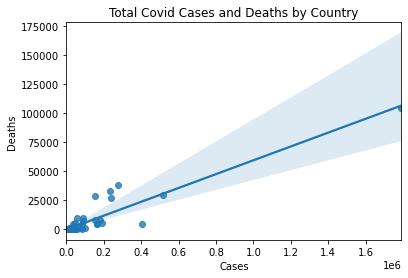

In [20]:
ax = sns.regplot(x='total_cases', y='total_deaths', data=covidtotals)
ax.set(xlabel='Cases', ylabel='Deaths', title='Total Covid Cases and Deaths by Country')

# Examine unexpected values above the regression line

In [21]:
covidtotals.loc[(covidtotals['total_cases'] < 300000) & (covidtotals['total_deaths'] > 20000)].T

iso_code,FRA,ITA,ESP,GBR
lastdate,2020-06-01,2020-06-01,2020-05-31,2020-06-01
location,France,Italy,Spain,United Kingdom
total_cases,151753,233019,239429,274762
total_deaths,28802,33415,27127,38489
total_cases_pm,"2,324.88","3,853.99","5,120.95","4,047.4"
total_deaths_pm,441.25,552.66,580.2,566.97
population,"65,273,512.0","60,461,828.0","46,754,783.0","67,886,004.0"
pop_density,122.58,205.86,93.11,272.9
median_age,42.0,47.9,45.5,40.8
gdp_per_capita,"38,605.67","35,220.08","34,272.36","39,753.24"


# Examine unexpected values below the regression line

In [22]:
covidtotals.loc[(covidtotals['total_cases'] > 300000) & (covidtotals['total_deaths'] < 10000)].T

iso_code,RUS
lastdate,2020-06-01
location,Russia
total_cases,405843
total_deaths,4693
total_cases_pm,"2,780.99"
total_deaths_pm,32.16
population,"145,934,460.0"
pop_density,8.82
median_age,39.6
gdp_per_capita,"24,765.95"


# Do a scatter plot of total cases per million by total deaths per million

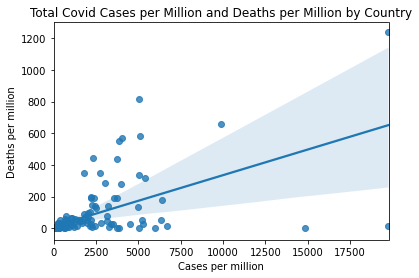

In [23]:
ax = sns.regplot(x='total_cases_pm', y='total_deaths_pm', data=covidtotals)
ax.set(xlabel='Cases per million',
       ylabel='Deaths per million',
       title='Total Covid Cases per Million and Deaths per Million by Country')
plt.show()

# Examine deaths per million above and below the regression line

In [25]:
covidtotals.loc[(covidtotals['total_cases_pm'] < 7500) &
                (covidtotals['total_deaths_pm'] > 250),
                ['location', 'total_cases_pm', 'total_deaths_pm']]

,location,total_cases_pm,total_deaths_pm
iso_code,,,
BEL,Belgium,"5,037.35",816.85
FRA,France,"2,324.88",441.25
IRL,Ireland,"5,060.96",334.56
IMN,Isle of Man,"3,951.45",282.25
ITA,Italy,"3,853.99",552.66
JEY,Jersey,"3,047.30",286.92
NLD,Netherlands,"2,710.38",347.60
SXM,Sint Maarten (Dutch part),"1,795.62",349.80
ESP,Spain,"5,120.95",580.20


In [26]:
covidtotals.loc[(covidtotals['total_cases_pm'] > 5000) &
                (covidtotals['total_deaths_pm'] <= 50),
                ['location', 'total_cases_pm', 'total_deaths_pm']]

,location,total_cases_pm,total_deaths_pm
iso_code,,,
BHR,Bahrain,"6,698.47",11.17
GIB,Gibraltar,"5,016.18",0.00
ISL,Iceland,"5,292.31",29.30
KWT,Kuwait,"6,332.42",49.64
QAT,Qatar,"19,753.15",13.19
SGP,Singapore,"5,962.73",3.93
VAT,Vatican,"14,833.13",0.00
